# Dimensionality Reduction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn import datasets

C:\Users\lousc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load the Dataset

Let's first load the data

In [33]:
RANDOM_STATE = 49

iris = datasets.load_iris()
X = iris.data
y = iris.target

# perform PCA with 2 principal components (there are 4 features)
pca = PCA(n_components=2)
pca.fit(X)

X_std = pca.transform(X)

# create two different train/test splits with and without PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y, random_state=RANDOM_STATE)

print("Here is the explained variance for each principal component:", pca.explained_variance_)

Here is the explained variance for each principal component: [4.22484077 0.24224357]


## Classification
Let's use a ridge classifier using classification accuracy to judge the effectiveness of PCA

In [34]:
clf_no_pca = RidgeClassifier()
clf_no_pca.fit(X_train, y_train)
y_pred = clf_no_pca.predict(X_test)
acc = 100 * accuracy_score(y_test, y_pred)
print("Without PCA, the ridge classifier gets an accuracy of %.2f%%" % acc)

Without PCA, the ridge classifier gets an accuracy of 86.84%


In [35]:
clf_pca = RidgeClassifier()
clf_pca.fit(X_std_train, y_std_train)
y_std_pred = clf_pca.predict(X_std_test)
acc = 100 * accuracy_score(y_std_test, y_std_pred)
print("With PCA, the ridge classifier gets an accuracy of %.2f%%" % acc)

With PCA, the ridge classifier gets an accuracy of 81.58%


## Plotting
Now, we will plot the first and second dimension with and without PCA

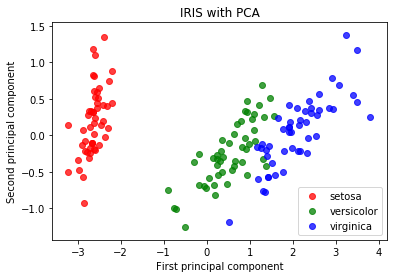

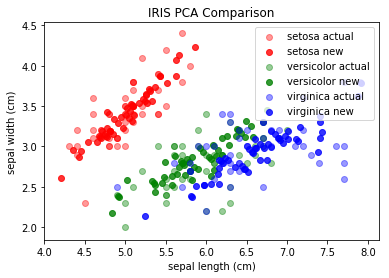

In [45]:
colors = ['red', 'green', 'blue']
dim_1 = 0
dim_2 = 1

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_std[y == i, dim_1], X_std[y == i, dim_2], color=color, alpha=.75,
                label=target_name)
plt.legend()
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title('IRIS with PCA')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    transformed_X = pca.inverse_transform(X_std)
    plt.scatter(X[y == i, dim_1], X[y == i, dim_2], color=color, alpha=.40,
                label=target_name + ' actual')
    plt.scatter(transformed_X[y == i, dim_1], transformed_X[y == i, dim_2], color=color, alpha=.80,
                label=target_name + ' new')
plt.legend()
plt.xlabel(iris.feature_names[dim_1])
plt.ylabel(iris.feature_names[dim_2])
plt.title('IRIS PCA Comparison')

plt.show()